# European Gas Transmission Network

In [22]:
import pandas as pd
import cartopy
import geopandas as gpd
import networkx as nx               
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import numpy as np


## Task1a

In [23]:
source = "https://tubcloud.tu-berlin.de/s/8SMwwWQyn6GiPez/download/scigrid-gas-nodes.geojson"
nod = gpd.read_file(data1).set_index('id')

In [24]:
nod.drop(columns=['country_code', 'geometry'], inplace=True)
nod

,x,y
id,,
INET_N_855,23.896413,53.017810
INET_N_1828,22.241386,52.984994
INET_N_329,20.619795,52.881484
INET_N_1612,13.592806,46.505528
INET_N_1009,13.416054,46.503733
...,...,...
SEQ_12031_p,12.328040,49.697490
NO_N_30,5.519794,59.272825
INET_N_379,14.556524,35.828836


In [25]:
source1 = "https://tubcloud.tu-berlin.de/s/fF6KKpWtJyS3BmD/download/scigrid-gas-pipelines.geojson"
edg = gpd.read_file(source1).set_index('index')
edg

,diameter_mm,is_bothDirection,length_km,max_cap_M_m3_per_d,max_pressure_bar,start_year,bus0,bus1,geometry
index,,,,,,,,,
INET_PL_273_EE_0_Seg_0_Seg_0,1420.0,0,110.841205,90.410959,84.0,1999.0,INET_N_855,INET_N_1828,"LINESTRING (23.89641 53.01781, 22.24139 52.98499)"
INET_PL_273_EE_1_Seg_0_Seg_0,1420.0,0,109.322286,90.410959,84.0,1999.0,INET_N_1828,INET_N_329,"LINESTRING (22.24139 52.98499, 20.61979 52.88148)"
INET_PL_357_Seg_0_Seg_0,1219.0,1,13.533434,101.066573,70.0,NaN,INET_N_1612,INET_N_1009,"LINESTRING (13.59281 46.50553, 13.41605 46.50373)"
INET_PL_359_Seg_0_Seg_0,1066.8,1,13.533434,101.066573,70.0,NaN,INET_N_1612,INET_N_1009,"LINESTRING (13.59281 46.50553, 13.41605 46.50373)"
INET_PL_361_Seg_0_Seg_0,1219.0,1,13.533434,101.066573,70.0,NaN,INET_N_1612,INET_N_1009,"LINESTRING (13.59281 46.50553, 13.41605 46.50373)"
...,...,...,...,...,...,...,...,...,...
EntsoG_Map__ST_25_Seg_0,900.0,0,72.845791,27.809143,70.0,NaN,SEQ_6435_p,INET_N_379,"LINESTRING (13.88715 36.19728, 14.55652 35.82884)"
EntsoG_Map__ST_26_Seg_0,900.0,0,89.750980,27.809143,70.0,NaN,N_14_M_LMGN,INET_N_1287,"LINESTRING (23.08042 61.76293, 21.39881 61.63817)"
EntsoG_Map__ST_26_Seg_0,900.0,0,6.882218,27.809143,70.0,NaN,SEQ_12356_p,Prod_33,"LINESTRING (6.75521 64.99419, 6.61159 64.98232)"


## Task1b

/opt/anaconda3/envs/esm-2024/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


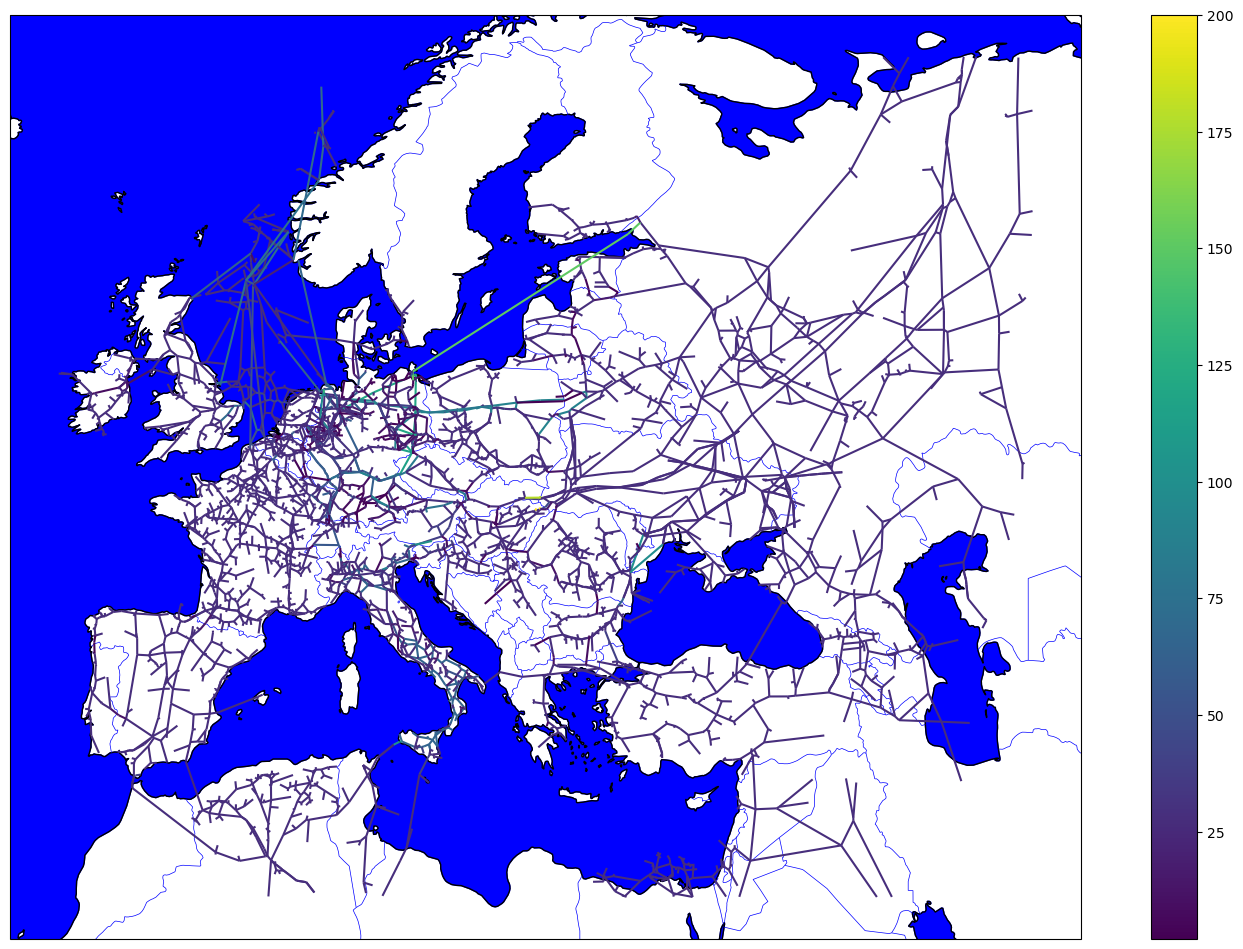

In [26]:
fig = plt.figure(figsize=(18,12))

ax = plt.axes(projection=ccrs.PlateCarree())

edg.plot(
    ax=ax,
    column='max_cap_M_m3_per_d',
    markersize='max_pressure_bar',
    legend=True
)
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, color='blue', linewidth=0.5)
ax.add_feature(cartopy.feature.OCEAN, color='blue')

## task 1c

In [27]:
max_press = edg[edg.max_pressure_bar == edg.max_pressure_bar.max()].index.tolist()
print(f"Pipeline/s with the highest maximum pressure = {edg.max_pressure_bar.max():.0f} bar are {max_press}")

Pipeline/s with the highest maximum pressure = 220 bar are ['PLL_84_Seg_0_Seg_0_Seg_0', 'PLL_84_Seg_0_Seg_62_Seg_2']


## Task 1d

/opt/anaconda3/envs/esm-2024/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


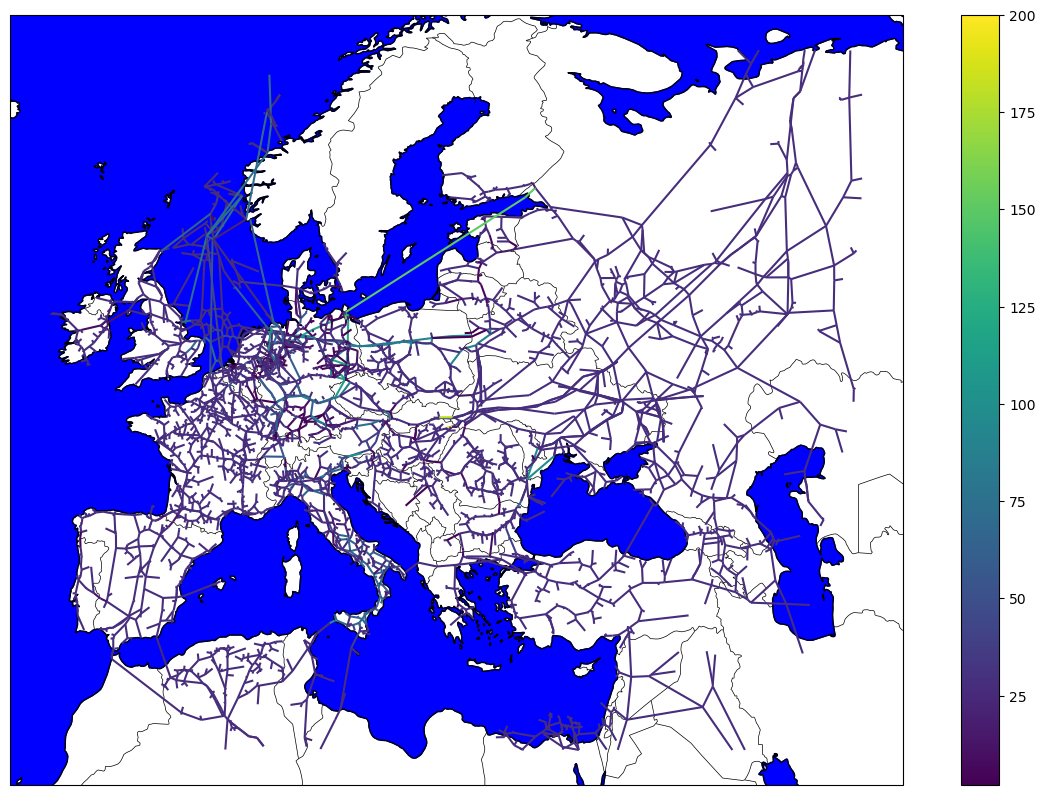

Percentage of pipelines crossing borders: 100.00%


In [31]:
edg['cross_border'] = edg.apply(lambda row: row['bus0'] != row['bus1'], axis=1)

# filtering the cross border piplines only
crs_brdr_pip = edg[edg['cross_border']]

# % calculatation 
crs_brdr_percentage = (len(crs_brdr_pip) / len(edg)) * 100

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection=ccrs.PlateCarree())

edg.plot(
    ax=ax,
    column='max_cap_M_m3_per_d',
    markersize='max_pressure_bar',
    legend=True
)
ax.coastlines()

ax.add_feature(cartopy.feature.BORDERS, color='black', linewidth=0.5)
ax.add_feature(cartopy.feature.OCEAN, color='blue')

#plt.title('Cross-Border Pipelines')
plt.show()

print(f"Percentage of pipelines crossing borders: {crs_brdr_percentage:.2f}%")

## task 1E

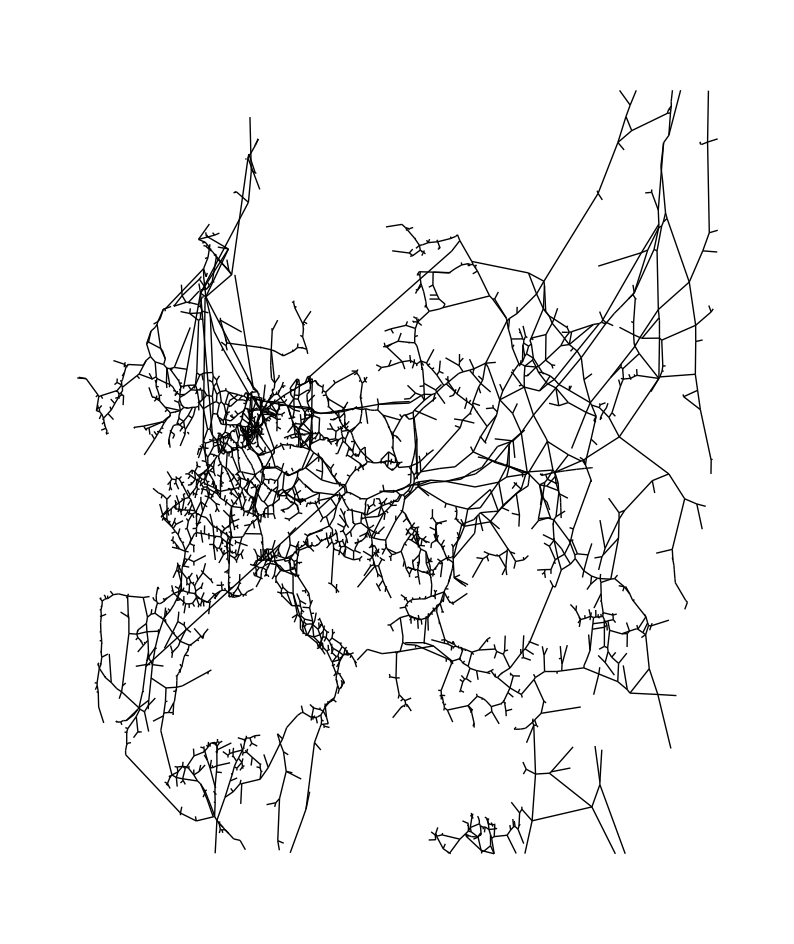

In [46]:

Net = nx.from_pandas_edgelist(edg, 'bus0', 'bus1', edge_attr=["max_cap_M_m3_per_d", "length_km",   "diameter_mm",  "max_pressure_bar"])
pos = nod.apply(tuple, axis=1).to_dict()
{k: pos[k] for k in list(pos.keys())[:2]}

fig, ax = plt.subplots(figsize=(10,12))
nx.draw(Net, pos=pos, node_size=0, ax=ax)

## Task 1f

<Axes: ylabel='Frequency'>

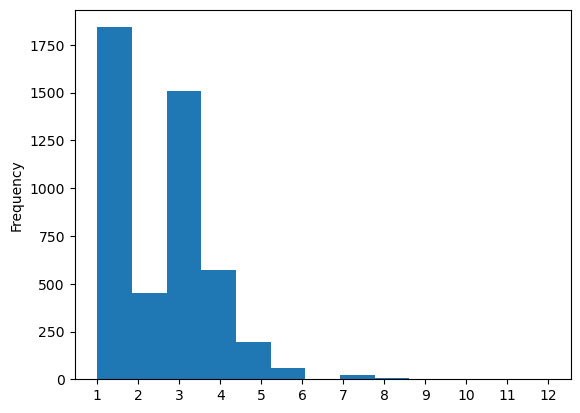

In [49]:

xx = pd.Series(dict(Net.degree()))
x = np.arange(0, 13, 1)
plt.xticks(x)
xx.plot.hist(bins=13)

## task1g

In [52]:
i= nx.incidence_matrix(Net, oriented=True).todense()
i

array([[-1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1., -1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1., -1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., -1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

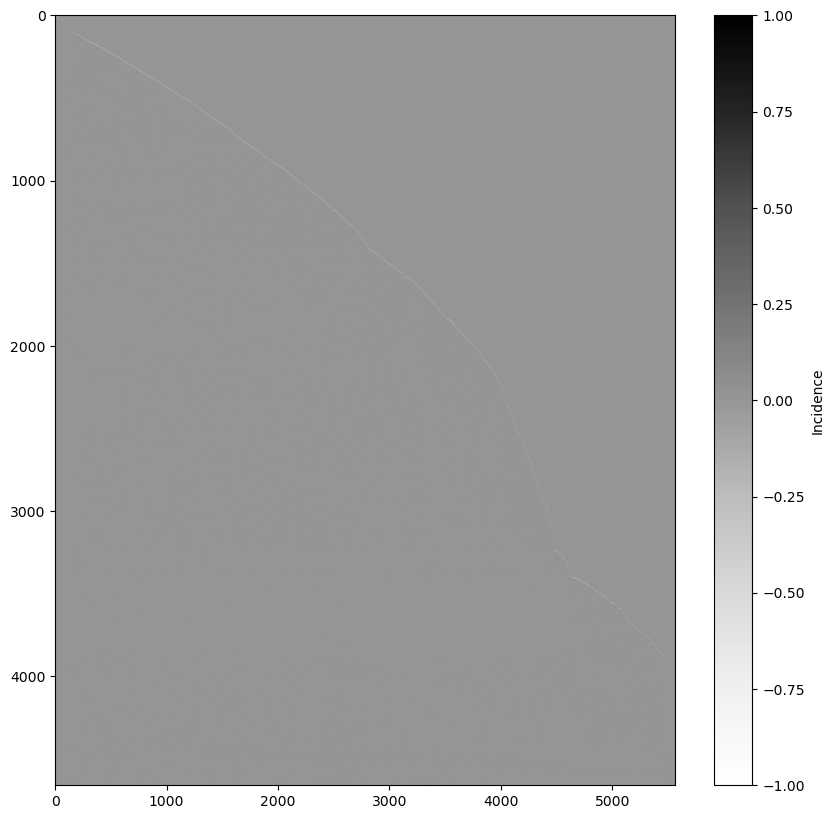

In [65]:
plt.figure(figsize=(10, 10))
plt.imshow(i, cmap='Greys', aspect='auto')
plt.colorbar(label='Incidence')
#plt.title('Incidence Matrix of European Gas Transmission Network')
#plt.xlabel('Edges')
#plt.ylabel('Nodes')
plt.show()